In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# Import Libraries we will use

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

# Knowing the name of our Excel sheet

In [3]:
def get_excel_sheet_names(file_path):
    # Load the Excel file
    xls = pd.ExcelFile(file_path)
    
    # Retrieve the sheet names
    sheet_names = xls.sheet_names
    
    return sheet_names

# Example usage
file_path = 'KPMG_VI_New_raw_data_update_final.xlsx'
sheet_names = get_excel_sheet_names(file_path)

print(sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


# Upload our Dataset

In [4]:
transactions = pd.read_excel(file_path, sheet_name='Transactions')
newcustomerlist = pd.read_excel(file_path, sheet_name='NewCustomerList')
customerdemographic = pd.read_excel(file_path, sheet_name='CustomerDemographic')
customeraddress = pd.read_excel(file_path, sheet_name='CustomerAddress')
print('upload successfully')

upload successfully


# Understand and cleaning out Dataset

## First : Transaction Dataset 

In [5]:
transactions.head()

transaction_id  product_id  customer_id transaction_date  online_order   
0               1           2         2950       2017-02-25           0.0  \
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size   
0     Approved           Solex     Standard        medium       medium  \
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0  
2     1793.43         248.82                  36361.0  
3     1198.46         381.10                  36145.0  
4     1765.30         709.48                  42226.0

In [6]:
transactions.shape

(20000, 13)

### Sure that the data in the correct Type : 

In [7]:
transactions.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

### Dealing with missing Data :

In [8]:
transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [9]:
threhold = len(transactions) * 0.05
print("threhold : ",threhold)
cols_to_drop = transactions.columns[transactions.isna().sum() <= threhold ]
transactions.dropna(subset=cols_to_drop,inplace=True)
transactions.isna().sum()

threhold :  1000.0


transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

## Cleaning the Transaction Dataset

### We insure that the Data contains allowable Value :

In [10]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [11]:
transactions['transaction_date'].dt.year.unique()

array([2017])

In [12]:
transactions['order_status'].unique()

array(['Approved', 'Cancelled'], dtype=object)

In [13]:
transactions['brand'].unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B'], dtype=object)

In [14]:
transactions['product_line'].unique()

array(['Standard', 'Road', 'Mountain', 'Touring'], dtype=object)

In [15]:
transactions['product_class'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [16]:
transactions['product_size'].unique()

array(['medium', 'large', 'small'], dtype=object)

### Last step insure that is no dublication in our data:

In [17]:
transactions.duplicated().sum()

0

### We now sure that Transaction Dataset is Cleaned and ready to next step
## second : The newcustomerlist Dataset

In [18]:
newcustomerlist.head()

first_name  last_name  gender  past_3_years_bike_related_purchases   
0    Chickie    Brister    Male                                   86  \
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

                   DOB                   job_title job_industry_category   
0           1957-07-12             General Manager         Manufacturing  \
1           1970-03-22         Structural Engineer              Property   
2  1974-08-28 00:00:00      Senior Cost Accountant    Financial Services   
3           1979-01-28  Account Representative III         Manufacturing   
4           1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...  state    country   
0      Mass Customer                  N      Yes  ...    QLD  Australia  \
1      Mass Customer                  N       No  ...    NSW  Australia   
2  Affluent Customer                  N       No  ...    VIC  Australia   
3  Affluent Customer                  N      Yes  ...    QLD  Australia   
4  Affluent Customer                  N       No  ...    NSW  Australia   

   property_valuation Unnamed: 16 Unnamed: 17  Unnamed: 18  Unnamed: 19   
0                   6        0.80       1.000       1.2500       1.0625  \
1                  11        0.60       0.600       0.7500       0.6375   
2                   5        0.99       0.990       0.9900       0.9900   
3                   1        1.02       1.275       1.2750       1.2750   
4                   9        1.01       1.010       1.2625       1.2625   

   Unnamed: 20  Rank     Value  
0            1     1  1.718750  
1            1     1  1.718750  
2            1     1  1.718750  
3            4     4  1.703125  
4            4     4  1.703125  

[5 rows x 23 columns]

In [19]:
newcustomerlist.shape

(1000, 23)

In [20]:
newcustomerlist.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

### We found columns that is hidden in excel we will not use we remove it

In [21]:
newcustomerlist = newcustomerlist.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'],axis=1)
newcustomerlist.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [22]:
newcustomerlist.dtypes

first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                   int64
address                                 object
postcode                                 int64
state                                   object
country                                 object
property_valuation                       int64
Rank                                     int64
Value                                  float64
dtype: object

### DOB should be a date not an object

In [23]:
newcustomerlist['DOB'] = pd.to_datetime(newcustomerlist['DOB'])

In [24]:
newcustomerlist.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

### Deal with missing value

In [25]:
newcustomerlist.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

## Remove rows contains missing data but if it's less than 5% of the Dataset

In [26]:
threhold = len(newcustomerlist) * 0.05
print("threhold : ",threhold)
cols_to_drop = newcustomerlist.columns[newcustomerlist.isna().sum() <= threhold ]
newcustomerlist.dropna(subset=cols_to_drop,inplace=True)
newcustomerlist.isna().sum()

threhold :  50.0


first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              102
job_industry_category                  159
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [27]:
Ans = 'Prefer not to say'
newcustomerlist['job_title']= newcustomerlist['job_title'].fillna(Ans)
newcustomerlist['job_industry_category']= newcustomerlist['job_industry_category'].fillna(Ans)
newcustomerlist.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

### Finaly we clean our Missing values

In [28]:
newcustomerlist.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

## We insure that the Data contains allowable Value :

In [29]:
newcustomerlist['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [30]:
newcustomerlist['DOB'].dt.year.unique()

array([1957, 1970, 1974, 1979, 1965, 1951, 1976, 1972, 1985, 1995, 1999,
       1964, 1954, 1993, 1938, 1968, 1998, 1977, 1982, 1945, 1952, 1966,
       1960, 1980, 1987, 1981, 1975, 1955, 1953, 1946, 1961, 1956, 1994,
       1950, 1978, 1983, 1971, 1942, 1967, 1996, 1984, 1988, 1958, 1973,
       1949, 1992, 1943, 2000, 1991, 1940, 1963, 1969, 1939, 1997, 1941,
       1990, 1962, 2001, 1986, 1989, 1944, 1959, 1948, 1947, 2002])

In [31]:
newcustomerlist['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [32]:
newcustomerlist['deceased_indicator'].unique()

array(['N'], dtype=object)

In [33]:
newcustomerlist['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
newcustomerlist['state'].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [35]:
newcustomerlist['country'].unique()

array(['Australia'], dtype=object)

### Last step insure that is no dublication in our data:

In [36]:
newcustomerlist.duplicated().sum()

0

### We now sure that newcustomerlist Dataset is Cleaned and ready to next step
## Third : The customerdemographic Dataset

In [37]:
customerdemographic.head()

customer_id      first_name  last_name  gender   
0            1         Laraine  Medendorp       F  \
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases                  DOB   
0                                   93  1953-10-12 00:00:00  \
1                                   81  1980-12-16 00:00:00   
2                                   61  1954-01-20 00:00:00   
3                                   33  1961-10-03 00:00:00   
4                                   56  1977-05-13 00:00:00   

                job_title job_industry_category     wealth_segment   
0     Executive Secretary                Health      Mass Customer  \
1  Administrative Officer    Financial Services      Mass Customer   
2      Recruiting Manager              Property      Mass Customer   
3                     NaN                    IT      Mass Customer   
4           Senior Editor                   NaN  Affluent Customer   

  deceased_indicator                                            default   
0                  N                                                 "'  \
1                  N                       <script>alert('hi')</script>   
2                  N                                2018-02-01 00:00:00   
3                  N  () { _; } >_[$($())] { touch /tmp/blns.shellsh...   
4                  N                                                NIL   

  owns_car  tenure  
0      Yes    11.0  
1      Yes    16.0  
2      Yes    15.0  
3       No     7.0  
4      Yes     8.0

In [38]:
customerdemographic.shape

(4000, 13)

In [39]:
customerdemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [40]:
customerdemographic = customerdemographic.drop(['default'],axis=1)

In [41]:
customerdemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [42]:
customerdemographic.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
owns_car                                object
tenure                                 float64
dtype: object

In [43]:
customerdemographic['DOB'] = pd.to_datetime(customerdemographic['DOB'])

In [44]:
customerdemographic.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                        float64
dtype: object

In [45]:
customerdemographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [46]:
cols_to_drop =["last_name","deceased_indicator",'DOB']
customerdemographic.dropna(subset=cols_to_drop,inplace=True)
customerdemographic.isna().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              481
job_industry_category                  631
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

In [47]:
Ans = 'Prefer not to say'
customerdemographic['job_title']= customerdemographic['job_title'].fillna(Ans)
customerdemographic['job_industry_category']= customerdemographic['job_industry_category'].fillna(Ans)
customerdemographic.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [48]:
print("Gender is :" , customerdemographic["gender"].unique())
print()
print("Dates in : ",customerdemographic['DOB'].dt.date.unique())
print()
print("Owns Car : ",customerdemographic["owns_car"].unique())
print()

Gender is : ['F' 'Male' 'Female' 'U' 'Femal' 'M']

Dates in :  [datetime.date(1953, 10, 12) datetime.date(1980, 12, 16)
 datetime.date(1954, 1, 20) ... datetime.date(1975, 12, 12)
 datetime.date(2001, 7, 13) datetime.date(1991, 11, 5)]

Owns Car :  ['Yes' 'No']



### We found that the is a Mistake in entering data in gender Column

In [49]:
customerdemographic['gender'] = customerdemographic['gender'].replace({'F': 'Female', 'M': 'Male'})
customerdemographic['gender'] = customerdemographic['gender'].replace({'Femal': 'Female'})
print("Gender is :" , customerdemographic["gender"].unique())

Gender is : ['Female' 'Male' 'U']


In [50]:
male_percentage = (customerdemographic['gender'] == 'Male').mean()
female_percentage = (customerdemographic['gender'] == 'Female').mean()
print("Male : " , male_percentage ,'\n', "female : ",female_percentage )

Male :  0.47705696202531644 
 female :  0.5226793248945147


In [51]:
# Calculate the percentage of 'U' values in the 'gender' column
u_percentage = 1.0 - male_percentage - female_percentage

# Count the number of 'U' values in the 'gender' column
u_count = (customerdemographic['gender'] == 'U').sum()

# Create an array of probabilities that sum to 1
probabilities = [male_percentage, female_percentage, u_percentage]

# Randomly replace 'U' values based on the adjusted probabilities
replacement_values = np.random.choice(['Male', 'Female', 'U'], u_count, p=probabilities)
customerdemographic.loc[customerdemographic['gender'] == 'U', 'gender'] = replacement_values

In [52]:
print("Gender is :" , customerdemographic["gender"].unique())

Gender is : ['Female' 'Male']


In [53]:
male_percentage = (customerdemographic['gender'] == 'Male').mean()
female_percentage = (customerdemographic['gender'] == 'Female').mean()
print("Male : " , male_percentage ,'\n', "female : ",female_percentage )

Male :  0.47705696202531644 
 female :  0.5229430379746836


In [54]:
customerdemographic.duplicated().sum()

0

### We now sure that customerdemographic Dataset is Cleaned and ready to next step
## Third : The CustomerAddress Dataset

In [55]:
customeraddress.head()

customer_id              address  postcode            state    country   
0            1   060 Morning Avenue      2016  New South Wales  Australia  \
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [56]:
customeraddress.shape

(3999, 6)

In [57]:
customeraddress.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [58]:
customeraddress.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [59]:
customeraddress[['address','postcode']].duplicated().sum()

0

In [60]:
customeraddress['country'].unique()

array(['Australia'], dtype=object)

In [61]:
customeraddress['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [62]:
customeraddress['state'] = customeraddress['state'].replace({'Victoria': 'VIC','New South Wales':'NSW'})
customeraddress['state'].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

## Now all the Date is Cleaned and we finished the preprossesing process

In [63]:
print(transactions.columns)
print()
print(newcustomerlist.columns)
print()
print(customerdemographic.columns)
print()
print(customeraddress.columns)

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')


## Combining the column first name and last name and drop them

In [64]:
customerdemographic['full_name'] = customerdemographic['first_name'] + ' ' + customerdemographic['last_name']
customerdemographic.drop(['first_name', 'last_name'], axis=1, inplace=True)
print("Done..")

Done..


In [65]:
newcustomerlist['full_name'] = newcustomerlist['first_name'] + ' ' + newcustomerlist['last_name']
newcustomerlist.drop(['first_name', 'last_name'], axis=1, inplace=True)
print("Done..")

Done..


# Combining the dataframes customerdemographic and customeraddress to easy analysing them

In [66]:
# Merge the two dataframes on the 'customer_id' column
Customer_info = customerdemographic.merge(customeraddress, on='customer_id', how='inner')

# Print the shape of the merged dataframe
print(Customer_info.shape)


(3788, 16)


In [67]:
Customer_info.head()

customer_id  gender  past_3_years_bike_related_purchases        DOB   
0            1  Female                                   93 1953-10-12  \
1            2    Male                                   81 1980-12-16   
2            5  Female                                   56 1977-05-13   
3            6    Male                                   35 1966-09-16   
4            7  Female                                    6 1976-02-23   

                job_title job_industry_category     wealth_segment   
0     Executive Secretary                Health      Mass Customer  \
1  Administrative Officer    Financial Services      Mass Customer   
2           Senior Editor     Prefer not to say  Affluent Customer   
3       Prefer not to say                Retail     High Net Worth   
4       Prefer not to say    Financial Services  Affluent Customer   

  deceased_indicator owns_car  tenure              full_name   
0                  N      Yes    11.0      Laraine Medendorp  \
1                  N      Yes    16.0            Eli Bockman   
2                  N      Yes     8.0  Sheila-kathryn Calton   
3                  N      Yes    13.0         Curr Duckhouse   
4                  N      Yes    11.0            Fina Merali   

               address  postcode state    country  property_valuation  
0   060 Morning Avenue      2016   NSW  Australia                  10  
1  6 Meadow Vale Court      2153   NSW  Australia                  10  
2  17979 Del Mar Point      2448   NSW  Australia                   4  
3     9 Oakridge Court      3216   VIC  Australia                   9  
4     4 Delaware Trail      2210   NSW  Australia                   9

## Getting Age of each customer from the date knowing the Date is made in 2016

In [76]:
from datetime import datetime
Customer_info['DOB'] = pd.to_datetime(Customer_info['DOB'])

# Convert 'current_date' to a datetime object
current_date = pd.to_datetime('2016-12-30')

# Calculate the age by subtracting DOB from the current date
Customer_info['Age'] = (current_date - Customer_info['DOB'])

# Convert the result to years and cast it to an integer
Customer_info['Age'] = (Customer_info['Age'] / np.timedelta64(1, 'Y')).astype(int)


In [77]:
Customer_info.head()

customer_id  gender  past_3_years_bike_related_purchases        DOB   
0            1  Female                                   93 1953-10-12  \
1            2    Male                                   81 1980-12-16   
2            5  Female                                   56 1977-05-13   
3            6    Male                                   35 1966-09-16   
4            7  Female                                    6 1976-02-23   

                job_title job_industry_category     wealth_segment   
0     Executive Secretary                Health      Mass Customer  \
1  Administrative Officer    Financial Services      Mass Customer   
2           Senior Editor     Prefer not to say  Affluent Customer   
3       Prefer not to say                Retail     High Net Worth   
4       Prefer not to say    Financial Services  Affluent Customer   

  deceased_indicator owns_car  tenure              full_name   
0                  N      Yes    11.0      Laraine Medendorp  \
1                  N      Yes    16.0            Eli Bockman   
2                  N      Yes     8.0  Sheila-kathryn Calton   
3                  N      Yes    13.0         Curr Duckhouse   
4                  N      Yes    11.0            Fina Merali   

               address  postcode state    country  property_valuation  Age  
0   060 Morning Avenue      2016   NSW  Australia                  10   63  
1  6 Meadow Vale Court      2153   NSW  Australia                  10   36  
2  17979 Del Mar Point      2448   NSW  Australia                   4   39  
3     9 Oakridge Court      3216   VIC  Australia                   9   50  
4     4 Delaware Trail      2210   NSW  Australia                   9   40

# Knowing there are a missleading information for ages above 100 

In [82]:
filtered_customers = Customer_info[Customer_info['Age'] > 90]

# Sum the ages of these customers
total_age = filtered_customers['Age'].sum()

# Print the total age
print(total_age)


173


## Remove all the Customer has ages more than 90

In [85]:
Customer_info =Customer_info[Customer_info['Age'] <= 90]
print(Customer_info['Age'].min(),Customer_info['Age'].max())

14 85


In [86]:
Customer_info.head()

customer_id  gender  past_3_years_bike_related_purchases        DOB   
0            1  Female                                   93 1953-10-12  \
1            2    Male                                   81 1980-12-16   
2            5  Female                                   56 1977-05-13   
3            6    Male                                   35 1966-09-16   
4            7  Female                                    6 1976-02-23   

                job_title job_industry_category     wealth_segment   
0     Executive Secretary                Health      Mass Customer  \
1  Administrative Officer    Financial Services      Mass Customer   
2           Senior Editor     Prefer not to say  Affluent Customer   
3       Prefer not to say                Retail     High Net Worth   
4       Prefer not to say    Financial Services  Affluent Customer   

  deceased_indicator owns_car  tenure              full_name   
0                  N      Yes    11.0      Laraine Medendorp  \
1                  N      Yes    16.0            Eli Bockman   
2                  N      Yes     8.0  Sheila-kathryn Calton   
3                  N      Yes    13.0         Curr Duckhouse   
4                  N      Yes    11.0            Fina Merali   

               address  postcode state    country  property_valuation  Age  
0   060 Morning Avenue      2016   NSW  Australia                  10   63  
1  6 Meadow Vale Court      2153   NSW  Australia                  10   36  
2  17979 Del Mar Point      2448   NSW  Australia                   4   39  
3     9 Oakridge Court      3216   VIC  Australia                   9   50  
4     4 Delaware Trail      2210   NSW  Australia                   9   40

## We create age  categories from ages ranging from 14 to 85

In [87]:
# Define the age bins and labels
age_bins = [14, 25, 35, 45, 55, 65, 75, 85]
age_labels = ['14-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-85']

# Create a new column 'Age_Group' that contains the age bins
Customer_info['Age_Group'] = pd.cut(Customer_info['Age'], bins=age_bins, labels=age_labels, right=False)


In [88]:
Customer_info.head()

customer_id  gender  past_3_years_bike_related_purchases        DOB   
0            1  Female                                   93 1953-10-12  \
1            2    Male                                   81 1980-12-16   
2            5  Female                                   56 1977-05-13   
3            6    Male                                   35 1966-09-16   
4            7  Female                                    6 1976-02-23   

                job_title job_industry_category     wealth_segment   
0     Executive Secretary                Health      Mass Customer  \
1  Administrative Officer    Financial Services      Mass Customer   
2           Senior Editor     Prefer not to say  Affluent Customer   
3       Prefer not to say                Retail     High Net Worth   
4       Prefer not to say    Financial Services  Affluent Customer   

  deceased_indicator owns_car  tenure              full_name   
0                  N      Yes    11.0      Laraine Medendorp  \
1                  N      Yes    16.0            Eli Bockman   
2                  N      Yes     8.0  Sheila-kathryn Calton   
3                  N      Yes    13.0         Curr Duckhouse   
4                  N      Yes    11.0            Fina Merali   

               address  postcode state    country  property_valuation  Age   
0   060 Morning Avenue      2016   NSW  Australia                  10   63  \
1  6 Meadow Vale Court      2153   NSW  Australia                  10   36   
2  17979 Del Mar Point      2448   NSW  Australia                   4   39   
3     9 Oakridge Court      3216   VIC  Australia                   9   50   
4     4 Delaware Trail      2210   NSW  Australia                   9   40   

  Age_Group  
0     55-64  
1     35-44  
2     35-44  
3     45-54  
4     35-44

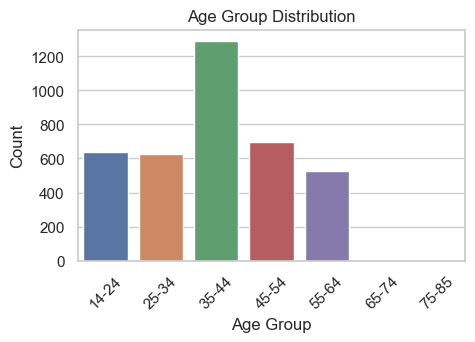

In [101]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.countplot(data=Customer_info, x='Age_Group', order=age_labels)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the histogram
plt.show()


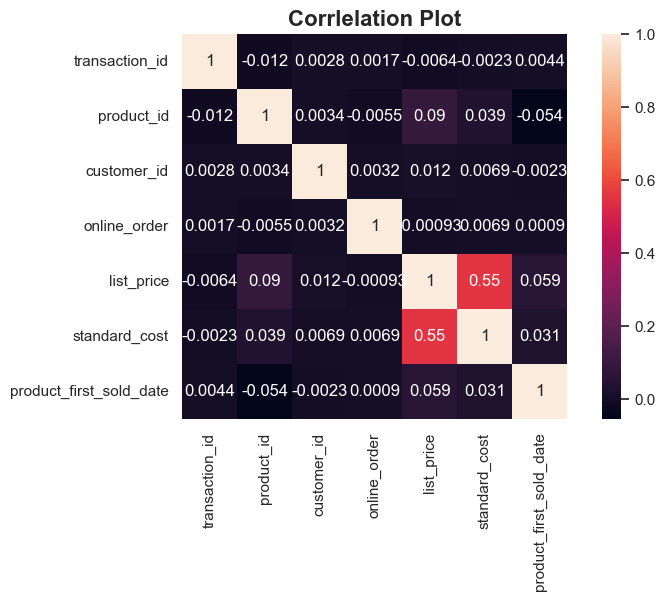

In [113]:
corr = transactions.corr(numeric_only=True)
plt.figure(figsize=(9,5))
sns.heatmap(corr,annot=True,square=True)
plt.title("Corrlelation Plot",fontsize=16,fontweight="bold")
plt.show()

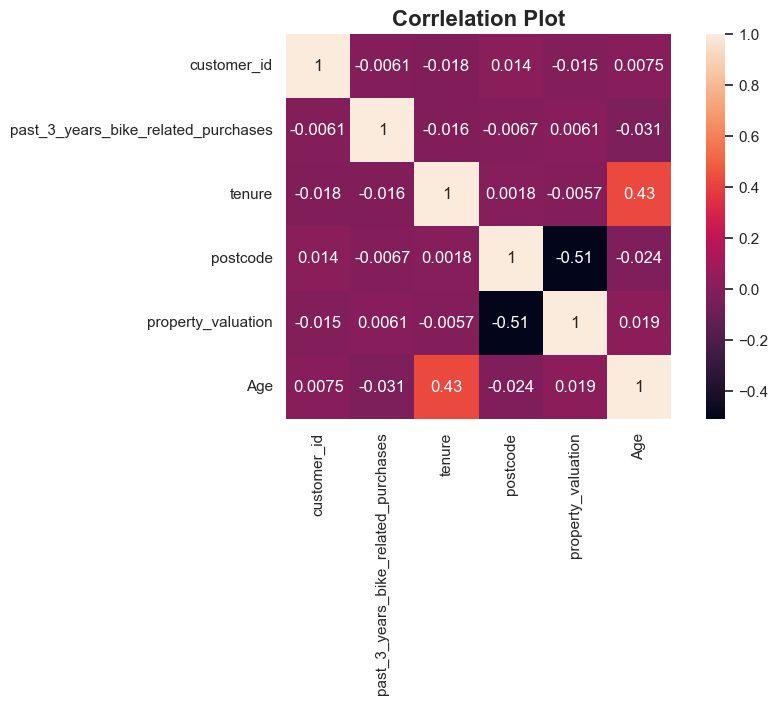

In [115]:
corr = Customer_info.corr(numeric_only=True)
plt.figure(figsize=(9,5))
sns.heatmap(corr,annot=True,square=True)
plt.title("Corrlelation Plot",fontsize=16,fontweight="bold")
plt.show()


## correlation occur between age and tenure

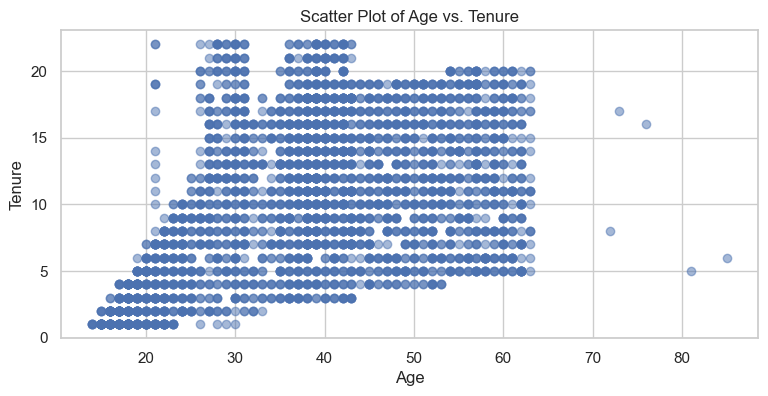

In [108]:
plt.figure(figsize=(9, 4))
plt.scatter(Customer_info['Age'], Customer_info['tenure'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Tenure')
plt.title('Scatter Plot of Age vs. Tenure')
plt.grid(True)
plt.show()

## people of the Younger Age will have a longer tenure